### Task 0. Train your word2vec model on an multi-document (for example) NLTK corpus.

* don’t forget to preprocess tokens first (lemmatization etc.)

In [8]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import string

In [3]:
import gensim.downloader

models = gensim.downloader.info()['models']

In [7]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)


def preprocess(text):
    tokens = word_tokenize(text.lower())  
    tokens = [word for word in tokens if word.isalpha()]  
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return tokens


sentences = []
for file_id in gutenberg.fileids():
    raw_text = gutenberg.raw(file_id)
    for sent in sent_tokenize(raw_text):
        processed = preprocess(sent)
        if processed: 
            sentences.append(processed)


model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


print(model.wv['die'])

[ 0.5211662  -0.10653714 -0.57076156  0.4412791   0.7692775  -0.4778325
  0.6237584   0.92253643  0.28104952 -0.5794801  -0.21474312 -0.24235912
 -0.61060727  0.58590525 -0.52899486  0.56234294 -0.5529528  -1.5284926
  0.8845566  -0.84039414  0.6528054   1.1230167   0.44040012  0.11642847
  0.10060295  0.12496348 -0.8234089  -0.6580271   0.11608488  0.5176803
  0.42255095  0.04172876  0.63032144 -0.48935467 -0.15270582 -0.16504285
 -0.8326918  -0.30546388 -1.1806763  -0.98058283  0.05708864 -0.92015946
  0.07797345  0.4936008   0.14567204 -0.94103795 -0.60361975 -0.6157832
 -0.25569952  0.9545938   0.8346653   0.16943024 -0.5196292   0.5461893
  0.43702242  1.0516137   1.267507   -0.53907937 -1.1178017   0.41591454
  0.13983268 -1.396766   -0.27247703 -0.07152925  0.6363477   0.6819977
 -0.7613927  -0.10046061  0.35652587 -0.22403185 -0.4601924  -0.19243431
  0.290586   -0.22204065  0.51112145 -0.5711106  -0.20396565 -0.5247634
 -0.18364611 -0.01294125 -0.07480861  0.73851246 -0.272463

### Task 1. Practice using similarity/distance.

In [13]:
model.wv.distance('die', 'live')

0.06194722652435303

In [20]:
model.wv.most_similar('flower', topn=10)

[('cedar', 0.9784551858901978),
 ('branch', 0.9766362905502319),
 ('withereth', 0.9729884266853333),
 ('olive', 0.9697203636169434),
 ('wild', 0.9692811965942383),
 ('leaf', 0.9682124257087708),
 ('blossom', 0.9639407396316528),
 ('spotted', 0.9634265303611755),
 ('soil', 0.9627395868301392),
 ('outmost', 0.9616597294807434)]

In [24]:
model.wv.similarity('plant', 'flower')

0.90276134

In [26]:
model.wv.doesnt_match(['flower', 'human', 'tulip'])

'human'

### Task 2. Visualize document distances on a plot.

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


documents = {}
for file_id in gutenberg.fileids():
    raw_text = gutenberg.raw(file_id)
    tokens = preprocess(raw_text)
    documents[file_id] = tokens

all_sentences = list(documents.values())
model = Word2Vec(all_sentences, vector_size=100, window=5, min_count=2, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

doc_vectors = np.array([document_vector(doc) for doc in documents.values()])

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
doc_embeddings_2d = tsne.fit_transform(doc_vectors)

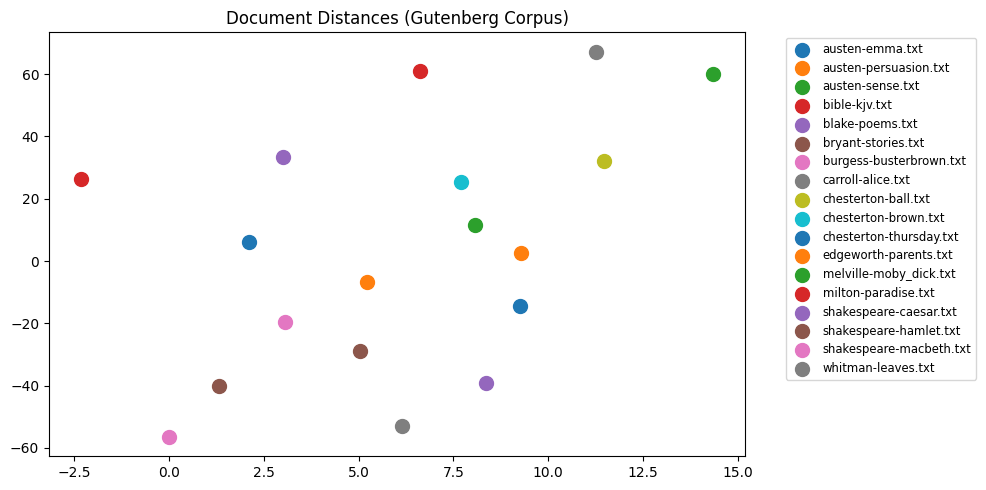

In [38]:
plt.figure(figsize=(10, 5))
for i, (file_id, coords) in enumerate(zip(documents.keys(), doc_embeddings_2d)):
    plt.scatter(*coords, marker='o', label=file_id, s=100)
    #plt.text(coords[0]+0.5, coords[1], file_id.split('.')[0], fontsize=9)

plt.title('Document Distances (Gutenberg Corpus)')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Task 3. Compare your own trained word2vec with pretrained Glove vectors, using `KeyedVectors.evaluate_word_pairs`